# Advertising Sales Channel Prediction
Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

# Machine Learning Steps:
        1.Define required libraries with which the model will optmised.
        2.Data Cleansing and Wrangling.
        3.Feature Engineering
        4.Data pre-processing
        5.Feature selection
        6.Split the data into training and testing
        7.Model selection
        8.Model validation
        9.Interpret the results

# 1.Define required libraries with which the model will optmised.

In [22]:
# as of now importing the pandas library remaining required are import at the instance
import pandas as pd

# Getting the Data

In [26]:
# loading the data set into variable
adv=pd.read_csv('advertising.csv')

In [27]:
# checking the data types and number of entries in each column

In [28]:
print( adv.size, adv.shape,'\n',adv.dtypes,adv.isna().sum())

1000 (200, 5) 
 Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


In [29]:
print(adv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


### Observations:
    1.there are 200 entries in each field.
    2.total 5 columns.
    3.sales field is output and the remaining are the input fields.
    4.except Unnamed field all are float data types and it is int data type.    

# 2.Data Cleansing and Wrangling.

In [30]:
# lets check for the NaN values
adv.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No empty entries in the data

# EDA(Exploratory Data Analysis)
    I.Statistical Analysis
    II.Graphical/data insight analysis

In [18]:
#loading the data set into DataFrame
data=pd.DataFrame(adv)

### I.statistical analysis

In [21]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Observations:
    1.In all the input variables std is very high so the spread of data is high
    2.mean and median are almost equal but not exactly matching
    3.percentile values are equally distributed between min and max values in first three input fields
    4.there is great variation in 75th percentile and the max value and 50th percentile, 75th percentile in newspaper column


### II.Graphical/data insight analysis

In [32]:
# importng the required visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Checking for outliers by using box plot
### univarient analysis

Unnamed: 0       AxesSubplot(0.125,0.125;0.133621x0.755)
TV            AxesSubplot(0.285345,0.125;0.133621x0.755)
radio          AxesSubplot(0.44569,0.125;0.133621x0.755)
newspaper     AxesSubplot(0.606034,0.125;0.133621x0.755)
sales         AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

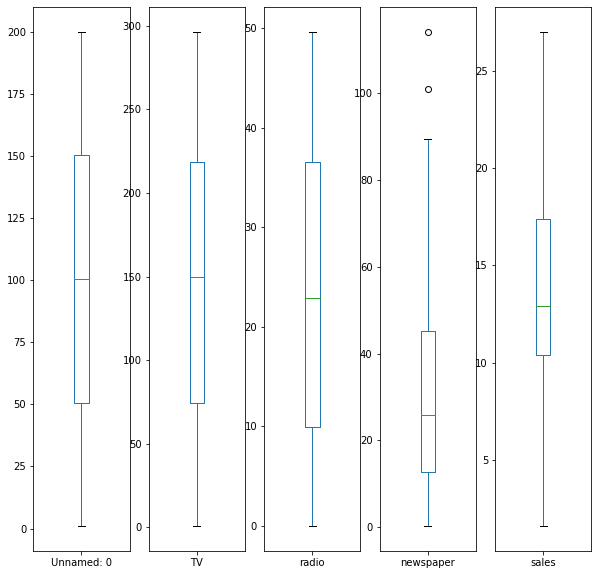

In [37]:
data.plot(kind='box', subplots=True, layout=(1,5), figsize=(10,10))

### Observations:
    1. Few outliers are present in Newspaper column
    2. remaining input variables are free from outliers

### bivarient analysis

In [38]:
data.head(1)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1


<AxesSubplot:xlabel='sales', ylabel='Unnamed: 0'>

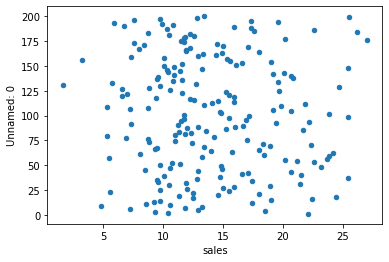

In [43]:
data.plot.scatter(x='sales',y='Unnamed: 0')

there is no such relation between the sales and the Unnamed field

<AxesSubplot:xlabel='sales', ylabel='TV'>

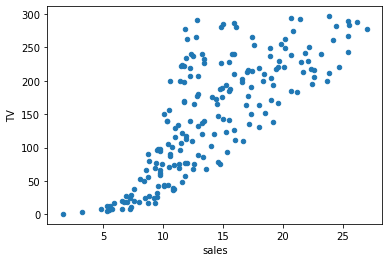

In [44]:
data.plot.scatter(x='sales',y='TV')

there is a positive relation between the sales and TV field

<AxesSubplot:xlabel='sales', ylabel='radio'>

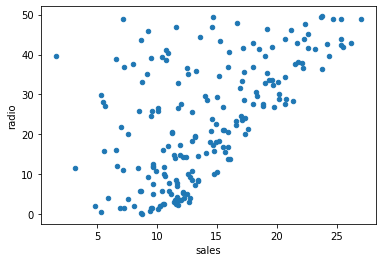

In [45]:
data.plot.scatter(x='sales',y='radio')

sales increases with the radio too

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

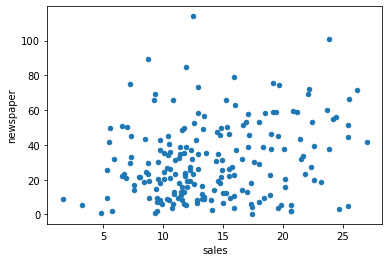

In [46]:
data.plot.scatter(x='sales',y='newspaper')

newspapers effort slightly increases the sale but not that much as compared to TV and radio

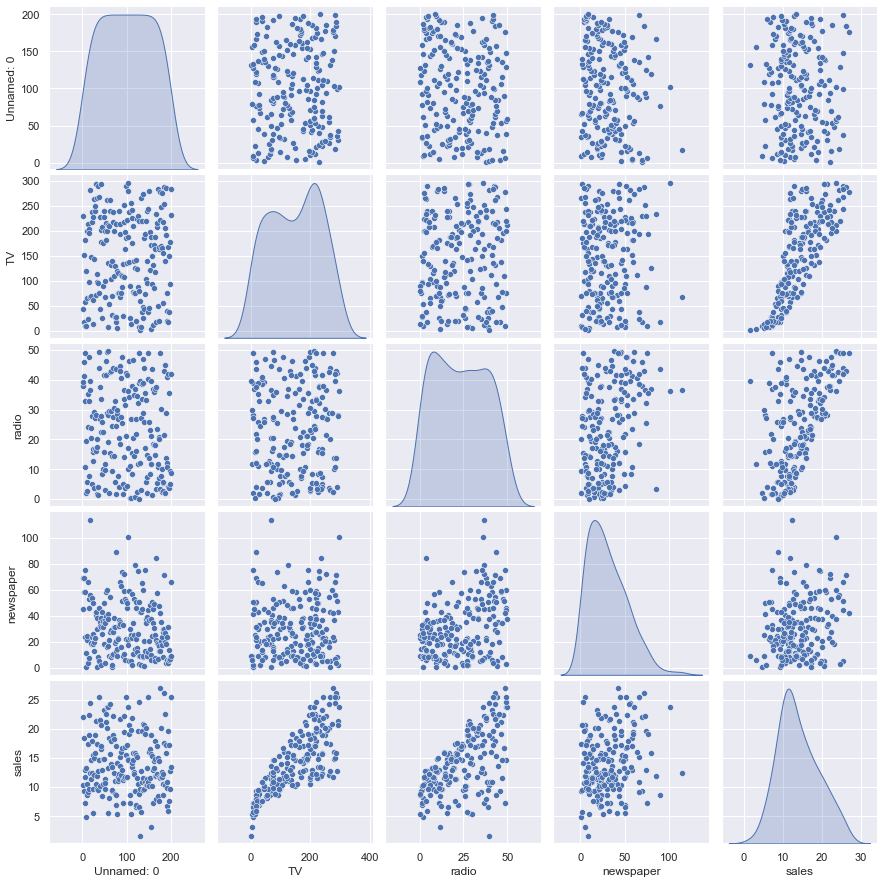

In [60]:
# understanding the reation between the variables with pair plot
sns.set_theme(color_codes='g', context='notebook', style='darkgrid')
sns.pairplot(data, diag_kind='kde')

<AxesSubplot:>

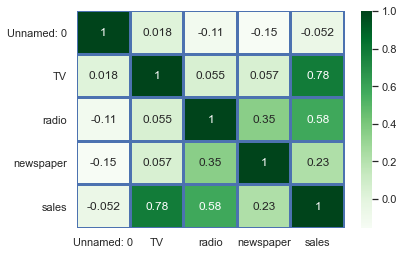

In [65]:
#checking the correlation 
sns.heatmap(data.corr(), annot=True, cmap="Greens", linewidths=2,linecolor='b')

### Observations:
    1.output sales having the positive correlation with TV, radio, newspaper
    2.very less -ve correlation with Unnammed
    3.the independent variables are not correleated with each other

## 3.Feature Engineering

In [71]:
#cheking for outliers
#for that import the zscore from scipy library and numpy library
from scipy.stats import zscore
import numpy as np

In [72]:
z=np.abs(zscore(data.iloc[:,:-1]))

In [73]:
throshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

Only 2 values are obtained as outliers
we should filter them to make the data as outliers free

In [76]:
data=data[(z<=3).all(axis=1)]

In [79]:
p=(adv.size-data.size)*100/adv.size
p

1.0

In [81]:
print("% data lost =",p,'%')

% data lost = 1.0 %


#### Variance Inflation calculation

As the independent variable are not much correlated with each other
this step is not required

#### Checking for Skewness

In [83]:
data.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

In [ ]:
#lets see the normal disturbition of each value

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Density'>

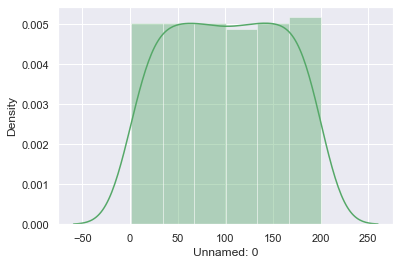

In [94]:
sns.distplot(data['Unnamed: 0'],color='g')

no skewness

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

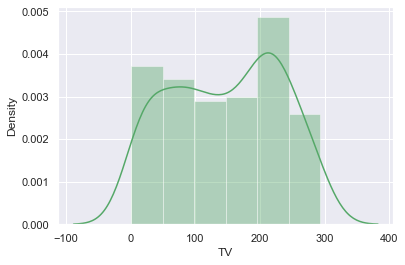

In [95]:
sns.distplot(data['TV'],color='g')

very less skewness

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

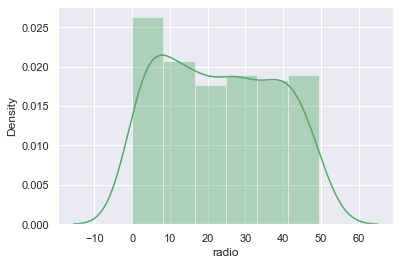

In [96]:
sns.distplot(data['radio'],color='g')

less skewness

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

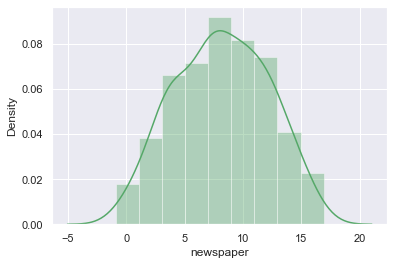

In [254]:
sns.distplot(data['newspaper'],color='g')

right skewed

# 4.Data pre-proceessing

In [98]:
#the right skewed newspaper shuold be reduced before proceeding further
from scipy.stats import boxcox

In [100]:
data['newspaper']=boxcox(data['newspaper'],0.5)

<ipython-input-100-29da0aa3892c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['newspaper']=boxcox(data['newspaper'],0.5)


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

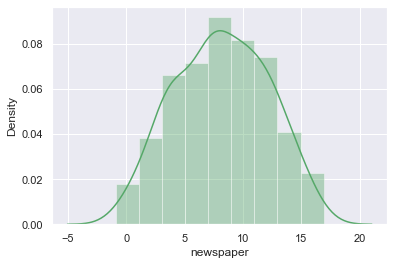

In [101]:
sns.distplot(data['newspaper'],color='g')

In [ ]:
after boxcox tansformation the skewness was removed

In [102]:
data['tv']=boxcox(data['TV'],0.5)

<ipython-input-102-23f96a7c6900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tv']=boxcox(data['TV'],0.5)


In [109]:
data.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper    -0.040649
sales         0.407130
dtype: float64

In [ ]:
#now the skewness was lessthen +/-0.5 in all the input values

<AxesSubplot:>

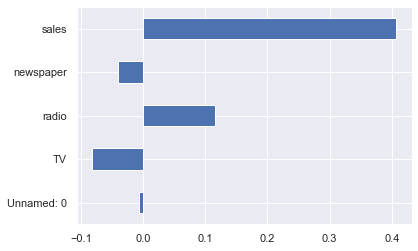

In [113]:
data.skew().plot.barh()

from the above bar graph one can see the skewness of all the input and output variables

#### scaling(normalization/standardization)

In [117]:
#in order to match the magnitudes of the data we will first reduce so that all will fall into same range
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [125]:
scale=StandardScaler()
scale.fit((data.iloc[:,:-1]))
scale.transform((data.iloc[:,:-1]))

array([[-1.73103384e+00,  9.78697339e-01,  9.89521352e-01,
         1.63669060e+00],
       [-1.71370862e+00, -1.19901165e+00,  1.09070498e+00,
         8.24807889e-01],
       [-1.69638341e+00, -1.51933199e+00,  1.53591293e+00,
         1.63973373e+00],
       [-1.67905820e+00,  5.64563564e-02,  1.22561648e+00,
         1.29728802e+00],
       [-1.66173298e+00,  4.00243389e-01, -8.31783915e-01,
         1.29397566e+00],
       [-1.64440777e+00, -1.61906543e+00,  1.73828018e+00,
         1.80970327e+00],
       [-1.62708256e+00, -1.04647815e+00,  6.52242599e-01,
        -1.21277595e-01],
       [-1.60975734e+00, -3.10797368e-01, -2.38173309e-01,
        -8.51517342e-01],
       [-1.59243213e+00, -1.62023876e+00, -1.41864895e+00,
        -2.07003868e+00],
       [-1.57510692e+00,  6.23176960e-01, -1.38492107e+00,
        -2.44520695e-01],
       [-1.55778170e+00, -9.45571378e-01, -1.16906267e+00,
        -8.49785485e-02],
       [-1.54045649e+00,  7.98003813e-01,  5.86319933e-02,
      

In [126]:
sdata=pd.DataFrame(scale.transform((data.iloc[:,:-1])), columns=data.iloc[:,:-1].columns)

In [127]:
sdata.describe()

,Unnamed: 0,TV,radio,newspaper
count,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02
mean,4.822181e-17,-2.186803e-16,4.373606e-17,5.270756e-17
std,1.002535e+00,1.002535e+00,1.002535e+00,1.002535e+00
min,-1.731034e+00,-1.712932e+00,-1.560306e+00,-2.299107e+00
25%,-8.604419e-01,-8.434913e-01,-8.908077e-01,-7.751478e-01
50%,-7.175088e-03,3.592300e-02,-4.929721e-02,-1.392252e-02
75%,8.634169e-01,8.422972e-01,8.900241e-01,7.849398e-01
max,1.716684e+00,1.723765e+00,1.785499e+00,2.212303e+00


the values are centred around the mean

In [128]:
scale=MinMaxScaler()
scale.fit((data.iloc[:,:-1]))
scale.transform((data.iloc[:,:-1]))

array([[0.        , 0.78320246, 0.76209677, 0.87240955],
       [0.00502513, 0.14953909, 0.79233871, 0.69244748],
       [0.01005025, 0.05633322, 0.92540323, 0.87308409],
       [0.01507538, 0.51485149, 0.83266129, 0.79717752],
       [0.0201005 , 0.61488563, 0.21774194, 0.7964433 ],
       [0.02512563, 0.02731308, 0.9858871 , 0.91075957],
       [0.03015075, 0.19392284, 0.66129032, 0.48273801],
       [0.03517588, 0.40798907, 0.39516129, 0.32087293],
       [0.04020101, 0.02697166, 0.04233871, 0.05077527],
       [0.04522613, 0.67975418, 0.05241935, 0.45541992],
       [0.05025126, 0.2232844 , 0.11693548, 0.49078406],
       [0.05527638, 0.73062479, 0.48387097, 0.16304104],
       [0.06030151, 0.07886651, 0.70766129, 0.8498697 ],
       [0.06532663, 0.33048822, 0.15322581, 0.23975017],
       [0.07035176, 0.69443496, 0.66330645, 0.69993299],
       [0.07537688, 0.66473199, 0.96169355, 0.75504522],
       [0.08542714, 0.95834756, 0.7983871 , 0.77712803],
       [0.09045226, 0.23386821,

In [131]:
sdata=pd.DataFrame(scale.transform((data.iloc[:,:-1])), columns=data.iloc[:,:-1].columns)

In [132]:
sdata.describe()

,Unnamed: 0,TV,radio,newspaper
count,198.000000,198.000000,198.000000,198.000000
mean,0.502081,0.498424,0.466347,0.509620
std,0.290782,0.291715,0.299639,0.222222
min,0.000000,0.000000,0.000000,0.000000
25%,0.252513,0.252987,0.200101,0.337801
50%,0.500000,0.508877,0.451613,0.506534
75%,0.752513,0.743513,0.732359,0.683610
max,1.000000,1.000000,1.000000,1.000000


the values are in between 0 and 1

# 6.Split the data into training and testing

In [139]:
x=sdata

In [140]:
y=data.iloc[:,-1]

In [141]:
x.shape,y.shape

((198, 4), (198,))

# 7.Model selection

since the output is a continuous data we have to select the model of regression type

In [299]:
#importing the required libraries for Logstics regression
import sklearn
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [144]:
#assigning the values for trainng and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10,random_state=42)

In [145]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((178, 4), (178,), (20, 4), (20,))

In [255]:
#model selection
lm=LinearRegression()
#fitting the values into the model
lm.fit(xtrain,ytrain)
#checking the liner regression coefficients(a,b,c,d) y=ax1+bx2+cx3+dx4
lm.coef_

array([-0.1019624 , 13.18281713,  9.49908553,  0.40890167])

In [256]:
# checking the intercept slop
lm.intercept_

2.843196509379476

In [257]:
#checking the output accuracy
lm.score(xtrain,ytrain)

0.8995793430649609

# 8.Model vaidation and hypermetric tuning and results interpretation

In [272]:
I=[]
score=[]
ma=[]
ms=[]
r2=[]
cv=[]

for i in range(1001):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10,random_state=i)
    lm.fit(xtrain,ytrain)
    tr=lm.score(xtrain,ytrain)
    te=lm.score(xtest,ytest)
    pre=lm.predict(xtest)
    mar=mean_absolute_error(ytest,pre)
    mse=np.sqrt(mean_squared_error(ytest,pre))
    CV=cross_val_score(lm,x,y,cv=4).mean()*100
    r=r2_score(ytest,pre)
    I.append(i)
    score.append(te)
    ma.append(mar)
    ms.append(mse)
    r2.append(r)
    cv.append(CV)
values=pd.DataFrame({'accuracy':score,'r2_score':r2,'r_state':I,'error':ms,'CV_score':cv})
values.sort_values(by='accuracy', ascending=False, inplace=True,ignore_index=True)
print('at random state',round(values.loc[0][2],0),'the model having the highest accuracy of',round(values.loc[0][0]*100,2),'%',"CV_Score",values.loc[0][-1])

at random state 546.0 the model having the highest accuracy of 97.09 % CV_Score 88.34239177249762


# Trainig 4 model for the liner regression

In [321]:
# 3 more model to complete the 4 models training
rf, ab,dt,lr=RandomForestRegressor(criterion='mae',n_estimators=150), AdaBoostRegressor(), DecisionTreeRegressor(), LogisticRegression()

In [322]:
l=[rf, ab, dt]

In [323]:
for j in l:   
    I=[]
    score=[]
    ma=[]
    ms=[]
    r2=[]
    cv=[]

    for i in range(1,1000):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10,random_state=i)
        j.fit(xtrain,ytrain)
        tr=j.score(xtrain,ytrain)
        te=j.score(xtest,ytest)
        pre=j.predict(xtest)
        mar=mean_absolute_error(ytest,pre)
        mse=np.sqrt(mean_squared_error(ytest,pre))
        CV=cross_val_score(j,x,y,cv=4).mean()*100
        r=r2_score(ytest,pre)
        I.append(i)
        score.append(te)
        ma.append(mar)
        ms.append(mse)
        r2.append(r)
        cv.append(CV)
    values=pd.DataFrame({'accuracy':score,'r2_score':r2,'r_state':I,'error':ms,'CV_score':cv})
    values.sort_values(by='accuracy', ascending=False, inplace=True,ignore_index=True)
    print(j)
    print('at random state',round(values.loc[0][2],0),'the model having the highest accuracy of',round(values.loc[0][0]*100,2),'%',"CV_Score",values.loc[0][-1])

RandomForestRegressor(criterion='mae', n_estimators=150)
at random state 365.0 the model having the highest accuracy of 99.33 % CV_Score 97.49194516943358
AdaBoostRegressor()
at random state 562.0 the model having the highest accuracy of 98.68 % CV_Score 95.41090776643412
DecisionTreeRegressor()
at random state 924.0 the model having the highest accuracy of 99.11 % CV_Score 93.80872904328001


### Hyper parameter tuning

In [286]:
from sklearn.model_selection import GridSearchCV

In [317]:
#creating perameters
model_par={'DecisionTreeRegressor':{'model':dt,'param':{'criterion' : ["mse", "friedman_mse", "mae", "poisson"]}},
           'RandomForestRegressor':{'model':rf,'param':{'n_estimators':[100,120,150],'criterion':['mse', 'mae']}},
           'AdaBoostRegressor':{'model':ab,'param':{'loss':['linear', 'square', 'exponential']}}
          }

In [318]:
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})

In [319]:
scores

[{'model': 'DecisionTreeRegressor', 'best_score': 0.9471039188328098, 'best_params': {'criterion': 'friedman_mse'}}, {'model': 'RandomForestRegressor', 'best_score': 0.9746216548922606, 'best_params': {'criterion': 'mae', 'n_estimators': 150}}, {'model': 'AdaBoostRegressor', 'best_score': 0.9519897242521175, 'best_params': {'loss': 'exponential'}}]

In [ ]:
Observations:
    as we did previously the RandomForestRegressor is having the high accuracy

In [324]:
#at random state 365 the RandomForestRegressor is having the highest accuracy of 99.36% 
#this is the best model for use
#so we using the RandomForestRegressor for this case

In [325]:
#model saving
import pickle
filename='Advertising.pkl'
pickle.dump(rf,open(filename,'wb'))

In [ ]:
RandomForestRegressor()